In [14]:
import numpy as np
import pyemma
import matplotlib.pyplot as plt
import pyemma.plots as mplt
%matplotlib inline
%run trajectories_class.py

In [15]:
def filter(f, stride):
    for i, line in enumerate(f):
        if (not i%stride):
            yield line

In [16]:
# Create a child class from the main class in trajectories_class.py
class asym2Dtraj(allTrajs_inner):
    def __init__(self, centers=None, Trajs=None):
        super(asym2Dtraj, self).__init__(Trajs)
        if centers == None:
            centers = []
        self.centers = centers
    
    # Overwrite getState function in parent class
    def getState(self, coord, prevst):
        for i in range(len(self.centers)):
            cen = np.asarray(self.centers[i])
            dist = np.linalg.norm(coord - cen)
            if dist <= 0.2:
                state = i
                return state
        # if no new state found, return previous state
        state = prevst
        return state
    
    # Overwrite getMilestones function
    def getMilestones(self):
        self.milestones = self.centers
    
    # Overwrite getRegionMap function
    def getRegionMap(self):
        for i in range(len(self.centers)):
            statename = 'State 1 ' + str(i)
            self.refionMap[i] = statename

In [17]:
numfiles = 16
# Extract trajectories from file using asym2Dtraj class
fname = '../data/asym2D/2DasymTrajsLong_'
minima = [[0.0,0.0], [1.0,0.0] , [1.1, 1.0], [-0.1,0.9], [-1.3,0.8], \
                       [-1.0,-0.2], [-0.6,-1.0], [0.9,-0.8], [0.2,-1.5]]
alltrajs = asym2Dtraj(minima, []) # define allTrajs object
#alltrajs = allTrajs_inner([])
dimension = 2
for number in range(numfiles):
    with open(fname + str(number)+'.txt') as f:
        data = np.genfromtxt(filter(f, 1))
        traj = data[:,1:dimension+1]
        alltrajs.Trajs.append(traj)

In [21]:
# Calculate discrete trajectories and make sure it is clean (no "None" elements)
dtrajs = alltrajs.getdTrajsclean()
# Obtain centers of each state and save
centersdict = alltrajs.getMilestones()
centers = alltrajs.getMilestonesArray()

In [22]:
# Obtained implied time scales using pyemma
its = pyemma.msm.its(dtrajs, lags = 1000)

estimating MaximumLikelihoodMSM: 100% (16/16) [####################] eta 00:00 \

(array([ -200.,     0.,   200.,   400.,   600.,   800.,  1000.]),
 <a list of 7 Text yticklabel objects>)

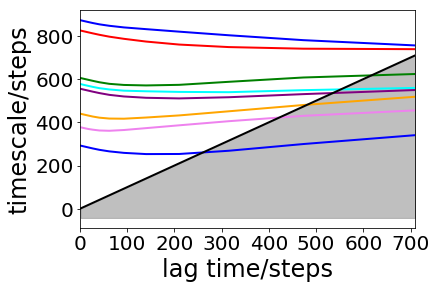

In [23]:
# Plot implied time scales
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2, dt=1)
plt.ylabel(r"timescale/steps", fontsize = 24)
plt.xlabel(r"lag time/steps", fontsize = 24)
#plt.xlim(0,900)
#plt.ylim(0,900)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

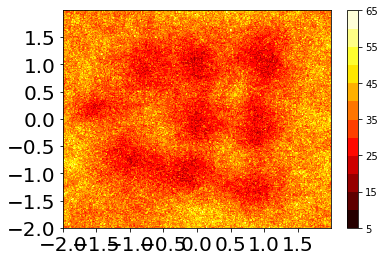

In [25]:
MSMradius = 2.0
X = np.arange(-MSMradius, MSMradius, 0.01)
Y = np.arange(-MSMradius, MSMradius, 0.01)
Zfull = np.zeros([X.shape[0]-1, X.shape[0]-1])
for traj in alltrajs.Trajs:
    hist = np.histogram2d(traj[:,0], traj[:,1], bins = [X, Y], normed=False)
    Zfull += hist[0]
extent = [X[0], X[-1], Y[0], Y[-1]]
cp = plt.contourf(Zfull, 10, cmap=plt.cm.hot, extent=extent)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.colorbar()

In [27]:
# Choose lag time and obtain MSM "M" for our milestones
msm_lag = 100
M = pyemma.msm.estimate_markov_model(dtrajs, msm_lag, reversible=True)

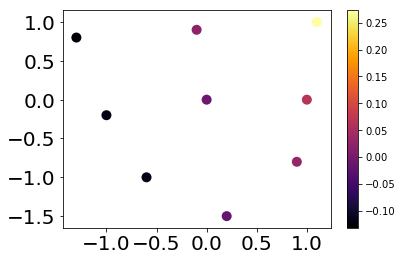

In [30]:
# Plot states and color them according to their weight in a given eigenmode
eigenmode = 2 # 0 = stationary distribution
vectors = M.eigenvectors_left()
value = M.eigenvalues()
#print M.timescales()[:10] 
#print -msm_lag/np.log(value[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sc = plt.scatter(centers[:,0], centers[:,1], c=vectors[eigenmode][:], cmap=plt.cm.inferno, linewidths = 0, s=100)
plt.colorbar()

In [ ]:
aa[:,1]